In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

## Reading and Training for Warpeace_input.txt

In [234]:
filename2 = "./dataset/text_data/warpeace_input.txt"

#raw_text is a string of characters
raw_text2 = open(filename2, 'r', encoding='utf-8').read()
raw_text2 = raw_text2.lower()

print(len(raw_text2))

#print the first 100 characters of raw_text
print(raw_text2[:100])

#print the character at index 5
print(raw_text2[5])


3046702
"well, prince, so genoa and lucca are now just family estates of the
buonapartes. but i warn you, if
,


In [235]:
#this block of codes is for testing only and evaluation only
#not necessary for the successful development of RNN model.

line2 = raw_text2.split('\n')
print(len(line2))
print(line2[10])

#arguments in fit_on_texts & texts_to_sequence are list of texts
#so need to ensure the texts are in list => need to enclose raw_text in [ ]
tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts([raw_text2])

sequences2 = list()

#encoded contains the number of sequences
for i in range(10,11):
#    encoded = tokenizer.texts_to_sequences([line[i]])[0]
    encoded2 = tokenizer2.texts_to_sequences([line2[i]]) [0]
   # print(len(line[i])) #number of characters
   # print([line[i]])
    print(encoded2)
    
    for j in range(1, len(encoded2)):
        sequence2 = encoded2[:j+1]
        print(sequence2)
        sequences2.append(sequence2)
    
print(len(sequences2))

#print([line])


59247
these words she greeted prince vasili kuragin, a man of high rank and
[132, 190, 24, 2860, 38, 290, 974, 5, 66, 4, 480, 1832, 2]
[132, 190]
[132, 190, 24]
[132, 190, 24, 2860]
[132, 190, 24, 2860, 38]
[132, 190, 24, 2860, 38, 290]
[132, 190, 24, 2860, 38, 290, 974]
[132, 190, 24, 2860, 38, 290, 974, 5]
[132, 190, 24, 2860, 38, 290, 974, 5, 66]
[132, 190, 24, 2860, 38, 290, 974, 5, 66, 4]
[132, 190, 24, 2860, 38, 290, 974, 5, 66, 4, 480]
[132, 190, 24, 2860, 38, 290, 974, 5, 66, 4, 480, 1832]
[132, 190, 24, 2860, 38, 290, 974, 5, 66, 4, 480, 1832, 2]
12


In [236]:
tokenizer2 = Tokenizer()

#arguments in fit_on_texts & texts_to_sequence are list of texts
#so to ensure the texts are in list => need to enclose raw_text in [ ]
tokenizer2.fit_on_texts([raw_text2])

vocab_size2 = len(tokenizer2.word_index) + 1  # Adding 1 because of reserved 0 index
print(vocab_size2)

sequences2 = list()

for line2 in raw_text2.split('\n'):
    encoded2 = tokenizer2.texts_to_sequences([line2])[0]
    
    for i in range(1, len(encoded2)):
        sequence2 = encoded2[:i+1]
        sequences2.append(sequence2)
        
print('Total Sequences: %d' % len(sequences2))

print(sequences2[100])
print(sequences2[101])
#print(sequences2[102])
#print(sequences2[103])
# pad input sequences
max_length2 = max([len(seq2) for seq2 in sequences2])
print('Max Sequence Length: %d' % max_length2)
sequences2 = pad_sequences(sequences2, maxlen=max_length2, padding='pre')
print(sequences2[100])
print(sequences2[101])
#print(sequences2[102])
#print(sequences2[103])
print(sequences2.shape)

17816
Total Sequences: 491219
[5169, 973, 4, 394]
[5169, 973, 4, 394, 2]
Max Sequence Length: 19
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 5169  973    4  394]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
 5169  973    4  394    2]
(491219, 19)


In [237]:
# split into input and output elements

#sequences[:,:-1] => extract all texts except the last text in each line
#sequences[:,-1] => extract only the last text in each line
X_train2, X_test2 = sequences2[:,:-1],sequences2[:,-1]
print(X_train2.shape)
print(X_test2.shape)
print(sequences2[1000])
print(X_train2[1000])
print(X_test2[1000])

(491219, 18)
(491219,)
[   0    0    0    0    0    0    0    0    0    0 1142  114 4050   17
 1171    1 3783   31   27]
[   0    0    0    0    0    0    0    0    0    0 1142  114 4050   17
 1171    1 3783   31]
27


In [238]:
def create_embedding_matrix2(filepath2, word_index2, embedding_dim2):
    vocab_size2 = len(word_index2) + 1  # Adding again 1 because of reserved 0 index
    
    embedding_matrix2 = np.zeros((vocab_size2, embedding_dim2))

    with open(filepath2, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index2:                
                idx2 = word_index2[word]
                #print("found", idx)
                embedding_matrix[idx2] = np.array(
                    vector, dtype=np.float32)[:embedding_dim2]

    return embedding_matrix2

In [239]:
embedding_dim2 = 100

embedding_matrix2 = create_embedding_matrix(
    './dataset/glove/glove.6B.100d.txt', 
    tokenizer2.word_index, embedding_dim2)

print(embedding_matrix2.shape)

(17816, 100)


In [240]:
#Create the directory ckpt if it does not exist.
#The ckpt directory is used to store the partially trained model
import os
checkpoint_dir2 = './ckpt2'
if not os.path.exists(checkpoint_dir2):
    os.makedirs(checkpoint_dir2)

In [241]:
def make_or_restore_model2():
    # Either restore the latest model, or create a fresh one
    # if there is no checkpoint available.
    checkpoints2 = [checkpoint_dir2 + '/' + name
                   for name in os.listdir(checkpoint_dir2)]
    if checkpoints2:
        latest_checkpoint2 = max(checkpoints2, key=os.path.getctime)
        print('Restoring from', latest_checkpoint2)
        return tf.keras.models.load_model(latest_checkpoint2)
    
    #create a new model
    print('Creating a new model')
    return make_model2()

In [242]:
## Uncomment following lines and fill in the blank wiht your answer

def make_model2():
    model2 = models.Sequential()
    model2.add(layers.Embedding(vocab_size2, embedding_dim2, 
                           weights=[embedding_matrix2], 
                           input_length=max_length-1, 
                           trainable=True))
    model2.add(layers.LSTM(50, return_sequences=True))  
    model2.add(layers.LSTM(50))
    model2.add(layers.Dense(vocab_size2, activation='softmax'))
    print(model2.summary())
    return model2

In [243]:
# The patience parameter is the amount of epochs to check for improvement

model2 = make_or_restore_model2()

early_stop2 = tf.keras.callbacks.EarlyStopping(patience=5, monitor='accuracy')

    # This callback checkpoint saves a SavedModel every epoch.
    # We include the epoch and accuracy in the file name.
checkpoint2 = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_dir + '/weights-improvement-{epoch:02d}-{accuracy:.2f}.hdf5', 
        monitor='accuracy',verbose=1,
        save_best_only=False, mode = 'max')

Creating a new model
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 15, 100)           1781600   
_________________________________________________________________
lstm_16 (LSTM)               (None, 15, 50)            30200     
_________________________________________________________________
lstm_17 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_8 (Dense)              (None, 17816)             908616    
Total params: 2,740,616
Trainable params: 2,740,616
Non-trainable params: 0
_________________________________________________________________
None


In [244]:
## Uncomment following lines and fill in the blank wiht your answer

model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [248]:
## Uncomment following lines and fill in the blank wiht your answer

history2 = model2.fit(X_train2, X_test2, epochs=50, verbose=1, callbacks= [early_stop2, checkpoint2])

Epoch 1/50
15351/15351 [==============================] - ETA: 0s - loss: 6.0521 - accuracy: 0.1153
Epoch 00001: saving model to ./ckpt\weights-improvement-01-0.12.hdf5
15351/15351 [==============================] - 676s 44ms/step - loss: 6.0521 - accuracy: 0.1153
Epoch 2/50
15350/15351 [============================>.] - ETA: 0s - loss: 5.5373 - accuracy: 0.1488
Epoch 00002: saving model to ./ckpt\weights-improvement-02-0.15.hdf5
15351/15351 [==============================] - 749s 49ms/step - loss: 5.5373 - accuracy: 0.1488
Epoch 3/50
15350/15351 [============================>.] - ETA: 0s - loss: 5.3293 - accuracy: 0.1614 ETA: 1s
Epoch 00003: saving model to ./ckpt\weights-improvement-03-0.16.hdf5
15351/15351 [==============================] - 753s 49ms/step - loss: 5.3293 - accuracy: 0.1614
Epoch 4/50
15351/15351 [==============================] - ETA: 0s - loss: 5.1940 - accuracy: 0.1693
Epoch 00004: saving model to ./ckpt\weights-improvement-04-0.17.hdf5
15351/15351 [===============

# This is for WarPeace_input.txt

In [250]:
## Uncomment following lines and fill in the blank wiht your answer

#print(history.history.keys())
loss, accuracy = model2.evaluate(X_train2, X_test2, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))


15351/15351 [==============================] - 186s 12ms/step - loss: 3.9770 - accuracy: 0.2753
Training Accuracy: 0.2753


## Saving Warpeace_input model

In [251]:
## Uncomment following lines and fill in the blank wiht your answer

model2.save("./model/warpeacegeneration_model.h5")
print("Saved model to disk")

Saved model to disk


## Reading and Training for alice_in_wonderland.txt

In [215]:
filename = "./dataset/text_data/alice_in_wonderland.txt"

#raw_text is a string of characters
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()

print(len(raw_text))

#print the first 100 characters of raw_text
print(raw_text[:100])

#print the character at index 5
print(raw_text[5])


148181
  alice was beginning to get very tired of sitting by her sister
on the bank, and of having nothing 
c


In [216]:
#this block of codes is for testing only and evaluation only
#not necessary for the successful development of RNN model.

line = raw_text.split('\n')
print(len(line))
print(line[10])

#arguments in fit_on_texts & texts_to_sequence are list of texts
#so need to ensure the texts are in list => need to enclose raw_text in [ ]
tokenizer = Tokenizer()
tokenizer.fit_on_texts([raw_text])

sequences = list()

#encoded contains the number of sequences
for i in range(10,11):
#    encoded = tokenizer.texts_to_sequences([line[i]])[0]
    encoded = tokenizer.texts_to_sequences([line[i]]) [0]
   # print(len(line[i])) #number of characters
   # print([line[i]])
    print(encoded)
    
    for j in range(1, len(encoded)):
        sequence = encoded[:j+1]
        print(sequence)
        sequences.append(sequence)
    
print(len(sequences))

#print([line])


3576
rabbit with pink eyes ran close by her.
[108, 21, 1494, 155, 231, 279, 74, 17]
[108, 21]
[108, 21, 1494]
[108, 21, 1494, 155]
[108, 21, 1494, 155, 231]
[108, 21, 1494, 155, 231, 279]
[108, 21, 1494, 155, 231, 279, 74]
[108, 21, 1494, 155, 231, 279, 74, 17]
7


In [217]:
tokenizer = Tokenizer()

#arguments in fit_on_texts & texts_to_sequence are list of texts
#so to ensure the texts are in list => need to enclose raw_text in [ ]
tokenizer.fit_on_texts([raw_text])

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
print(vocab_size)

sequences = list()

for line in raw_text.split('\n'):
    encoded = tokenizer.texts_to_sequences([line])[0]
    
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)
        
print('Total Sequences: %d' % len(sequences))

print(sequences[100])
print(sequences[101])
#print(sequences[102])
#print(sequences[103])
# pad input sequences
max_length = max([len(seq) for seq in sequences])
print('Max Sequence Length: %d' % max_length)
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print(sequences[100])
print(sequences[101])
#print(sequences[102])
#print(sequences[103])
print(sequences.shape)

2638
Total Sequences: 25049
[108, 21, 1494, 155]
[108, 21, 1494, 155, 231]
Max Sequence Length: 16
[   0    0    0    0    0    0    0    0    0    0    0    0  108   21
 1494  155]
[   0    0    0    0    0    0    0    0    0    0    0  108   21 1494
  155  231]
(25049, 16)


In [218]:
# split into input and output elements

#sequences[:,:-1] => extract all texts except the last text in each line
#sequences[:,-1] => extract only the last text in each line
X_train, X_test = sequences[:,:-1],sequences[:,-1]
print(X_train.shape)
print(X_test.shape)
print(sequences[1000])
print(X_train[1000])
print(X_test[1000])

(25049, 15)
(25049,)
[  0   0   0   0   0   0   0   0   0   0   0   0   0 868 128   1]
[  0   0   0   0   0   0   0   0   0   0   0   0   0 868 128]
1


In [219]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:                
                idx = word_index[word]
                #print("found", idx)
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [220]:
embedding_dim = 100

embedding_matrix = create_embedding_matrix(
    './dataset/glove/glove.6B.100d.txt', 
    tokenizer.word_index, embedding_dim)

print(embedding_matrix.shape)

(2638, 100)


In [97]:
#Create the directory ckpt if it does not exist.
#The ckpt directory is used to store the partially trained model
import os
checkpoint_dir = './ckpt'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

In [98]:
def make_or_restore_model():
    # Either restore the latest model, or create a fresh one
    # if there is no checkpoint available.
    checkpoints = [checkpoint_dir + '/' + name
                   for name in os.listdir(checkpoint_dir)]
    if checkpoints:
        latest_checkpoint = max(checkpoints, key=os.path.getctime)
        print('Restoring from', latest_checkpoint)
        return tf.keras.models.load_model(latest_checkpoint)
    
    #create a new model
    print('Creating a new model')
    return make_model()

In [99]:
## Uncomment following lines and fill in the blank wiht your answer

def make_model():
    model = models.Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=max_length-1, 
                           trainable=True))
    model.add(layers.LSTM(50, return_sequences=True))  
    model.add(layers.LSTM(50))
    model.add(layers.Dense(vocab_size, activation='softmax'))
    print(model.summary())
    return model

In [100]:
# The patience parameter is the amount of epochs to check for improvement

model = make_or_restore_model()

early_stop = tf.keras.callbacks.EarlyStopping(patience=5, monitor='accuracy')

    # This callback checkpoint saves a SavedModel every epoch.
    # We include the epoch and accuracy in the file name.
checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_dir + '/weights-improvement-{epoch:02d}-{accuracy:.2f}.hdf5', 
        monitor='accuracy',verbose=1,
        save_best_only=False, mode = 'max')

Creating a new model
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 15, 100)           263800    
_________________________________________________________________
lstm_4 (LSTM)                (None, 15, 50)            30200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 2638)              134538    
Total params: 448,738
Trainable params: 448,738
Non-trainable params: 0
_________________________________________________________________
None


In [101]:
## Uncomment following lines and fill in the blank wiht your answer

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [102]:
## Uncomment following lines and fill in the blank wiht your answer

history = model.fit(X_train, X_test, epochs=500, verbose=1, callbacks= [early_stop, checkpoint])

Epoch 1/500
781/783 [============================>.] - ETA: 0s - loss: 6.1053 - accuracy: 0.0591
Epoch 00001: saving model to ./ckpt\weights-improvement-01-0.06.hdf5
783/783 [==============================] - 19s 25ms/step - loss: 6.1041 - accuracy: 0.0592
Epoch 2/500
782/783 [============================>.] - ETA: 0s - loss: 5.7573 - accuracy: 0.0641
Epoch 00002: saving model to ./ckpt\weights-improvement-02-0.06.hdf5
783/783 [==============================] - 19s 24ms/step - loss: 5.7585 - accuracy: 0.0640
Epoch 3/500
781/783 [============================>.] - ETA: 0s - loss: 5.5719 - accuracy: 0.0873
Epoch 00003: saving model to ./ckpt\weights-improvement-03-0.09.hdf5
783/783 [==============================] - 19s 25ms/step - loss: 5.5703 - accuracy: 0.0873
Epoch 4/500
782/783 [============================>.] - ETA: 0s - loss: 5.3853 - accuracy: 0.1046
Epoch 00004: saving model to ./ckpt\weights-improvement-04-0.10.hdf5
783/783 [==============================] - 19s 24ms/step - loss

# This is for Alice_in_Wonderland.txt

In [108]:
## Uncomment following lines and fill in the blank wiht your answer

#print(history.history.keys())
loss, accuracy = model.evaluate(X_train, X_test, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))


783/783 [==============================] - 13s 16ms/step - loss: 0.5154 - accuracy: 0.8786
Training Accuracy: 0.8786


## Saving Alice in wonderland.txt model as its higher accuracy

In [190]:
## Uncomment following lines and fill in the blank wiht your answer

model.save("./model/wonderlandgeneration2.0_model.h5")
print("Saved model to disk")

Saved model to disk


## Graph for Alice in wonderland

<function matplotlib.pyplot.show(close=None, block=None)>

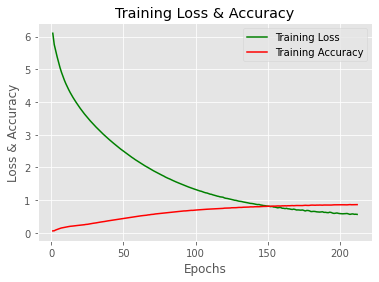

In [189]:
loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,'y', label = 'Training Loss', color='green')
plt.plot(epochs, accuracy, 'y', label='Training Accuracy', color='red')
plt.title('Training Loss & Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss & Accuracy')
plt.legend()
plt.show

In [191]:
## Uncomment following lines and fill in the blank wiht your answer

#in_text = 'This is a warm and sunny place'
in_text = 'In a land full of mist'
array1 = []
array2 = []
array3 = []
array4 = []
array5 = []

#uncomment the following two lines if using the saved model
model = models.Sequential()
model = models.load_model("./model/wonderlandgeneration2.0_model.h5")

# generate a fixed number of words, in this case 30 words
for _ in range(500):
    # encode the text as integer
    encoded = tokenizer.texts_to_sequences([in_text])[0]
    # pre-pad sequences to a fixed length
    encoded = pad_sequences([encoded], maxlen=max_length - 1, padding='pre')
    # predict probabilities for each word


    yhat = model.predict(encoded) #yhat contains the probability of each vocabs

    # map predicted word index to word
    out_word = ''
    for word, index in tokenizer.word_index.items():

        if index == np.argmax(yhat):
            out_word = word
            break
    # append to input
    in_text += ' ' + out_word

splat = in_text.split("'")
for number, paragraph in enumerate(splat, 1):
    if number % 5 == 1:
        array1 += [paragraph]
    elif number % 5 == 2:
        array2 += [paragraph]
    elif number % 5 == 3:
        array3 += [paragraph]
    elif number % 5 == 4:
        array4 += [paragraph]
    elif number % 5 == 0:
        array5 += [paragraph]
        
print("\nParagraph 1: " + str(array1))
print("\nParagraph 2: " + str(array2))
print("\nParagraph 3: " + str(array3))
print("\nParagraph 4: " + str(array4))
print("\nParagraph 5: " + str(array5))


Paragraph 1: ['In a land full of mist your carrier i i do do i', 'd ', ' said alice i will school by some these alive ', ' said alice timidly his head very very by the rest pepper and came mad see can', ' he said what mouse it', ' alice with afraid to white was hastily at written rather rattling to waiting so they got to make the day croquet who i can guess that ', 't a deal of this ', ' but they sat down and much her chin and']

Paragraph 2: ['m a caucus let ', ' said this a footman all its door off their hearing either change of great inches made worse than if i', ' said alice these kept all makes me grow up used towards where these ready mentioned towards hunting sad on and mad day used mentioned tone can', 't pepper she walked up and went and follows silence but where was only march its piece going ', 's down said i was those thing ', ' screamed alice who is that i don', ' said the mock turtle alice what glad once don']

Paragraph 3: [' close those again i doing so mad me see ', '

In [193]:
## Uncomment following lines and fill in the blank wiht your answer

#in_text = 'This is a warm and sunny place'
in_text = 'In a land full of mist'

#uncomment the following two lines if using the saved model
model = models.Sequential()
model = models.load_model("./model/wonderlandgeneration2.0_model.h5")

# generate a fixed number of words, in this case 30 words
for i in range(1,6):
    for _ in range(50):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # pre-pad sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=max_length - i, padding='pre')
        # predict probabilities for each word


        yhat = model.predict(encoded) #yhat contains the probability of each vocabs

        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():

            if index == np.argmax(yhat):
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
    print('\nParagraph ' + str(i) + ': ' + str(in_text) + '\n')


Paragraph 1: In a land full of mist your carrier i i do do i'm a caucus let ' close those again i doing so mad me see ' on half the trembling voice as soon to leave the unrolled the once it suddenly the whole while in a large all over by their faces in his pocket


Paragraph 2: In a land full of mist your carrier i i do do i'm a caucus let ' close those again i doing so mad me see ' on half the trembling voice as soon to leave the unrolled the once it suddenly the whole while in a large all over by their faces in his pocket to having quite impossible to look at it and when one of us use and i declare ' said alice it's always so much about it and fortunately is ' said alice a very somersault on and she came and make herself evidence to all these first day ' thought


Paragraph 3: In a land full of mist your carrier i i do do i'm a caucus let ' close those again i doing so mad me see ' on half the trembling voice as soon to leave the unrolled the once it suddenly the whole while in a la